# 演習の解答例

2-1で取得した気象データを下記のように整形

|列名|説明|
|---------|---------|
|mean_temp|平均気温(℃)|
|max_temp |最高気温(℃)|
|min_temp |最低気温(℃)|
|humidity |平均湿度(％)|
|relative_humidity|最小相対湿度(％)|
|pressure|平均現地気圧(hPa)|
|precipitation|降水量の合計(mm)|
|duration|日照時間(時間)|
|wind|平均風速(m/s)|

詳細は `3-B-handling-weather.ipynb` を参照

※ Colabの場合のみ次のセルをコメントをはずして実行

In [1]:
# %%bash

# wget https://github.com/terapyon/intro-to-visualization-tutorial/archive/master.zip
# unzip master.zip
# mv intro-to-visualization-tutorial-master/data ../.
# rm -rf master.zip intro-to-visualization-tutorial-master

In [2]:
%matplotlib inline

import calendar
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_pickle("../data/weather.pickle")
df.head()

mean_temp  max_temp  min_temp  humidity  relative_humidity  \
date                                                                     
2018-01-01        6.8      13.3       1.6      51.0               20.0   
2018-01-02        7.3      11.4       4.8      34.0               21.0   
2018-01-03        5.2       8.8       1.4      37.0               16.0   
2018-01-04        4.8      10.0       0.2      37.0               19.0   
2018-01-05        3.5       6.1       1.6      60.0               38.0   

            pressure  precipitation  duration  wind  
date                                                 
2018-01-01    1011.9            0.0       9.3   3.1  
2018-01-02    1013.4            0.0       9.3   4.6  
2018-01-03    1012.5            0.0       9.5   6.2  
2018-01-04    1017.3            0.0       9.4   2.6  
2018-01-05    1014.6            0.5       0.1   1.7

## Q-1

任意のデータを線グラフに可視化

### ヒント
列データの抽出は `df["列名"]`  
複数列を抽出する場合は `df[["列名1", "列名1"]]`

Text(0.5, 1.0, 'air pressure')

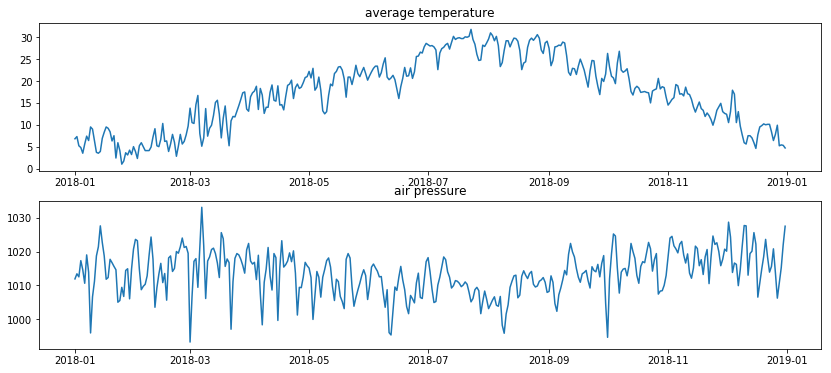

In [3]:
# 解答例

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(df["mean_temp"])
ax2.plot(df["pressure"])
ax1.set_title("average temperature")
ax2.set_title("air pressure")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feda9af9748>,
      dtype=object)

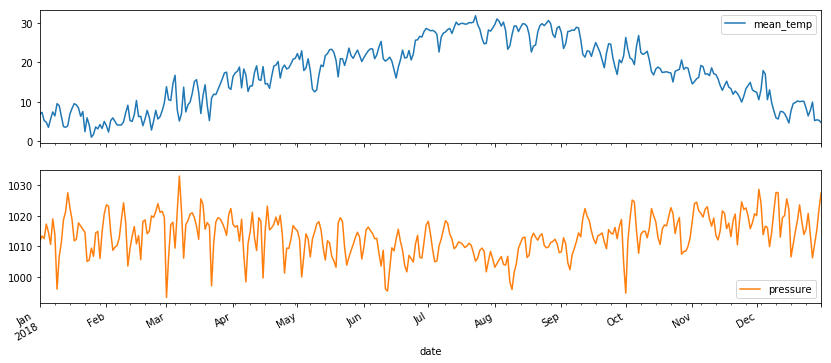

In [4]:
# pandasを用いた場合の解答例

df[["mean_temp", "pressure"]].plot(subplots=True, figsize=(14, 6))

## Q-2

任意のデータを散布図に可視化

Text(0, 0.5, 'precipitation')

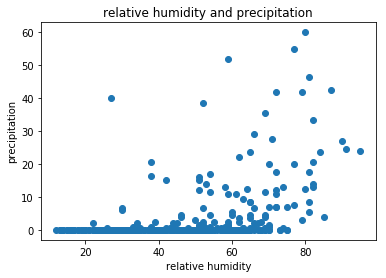

In [5]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["relative_humidity"], df["precipitation"])
ax.set_title("relative humidity and precipitation")
ax.set_xlabel("relative humidity")
ax.set_ylabel("precipitation")

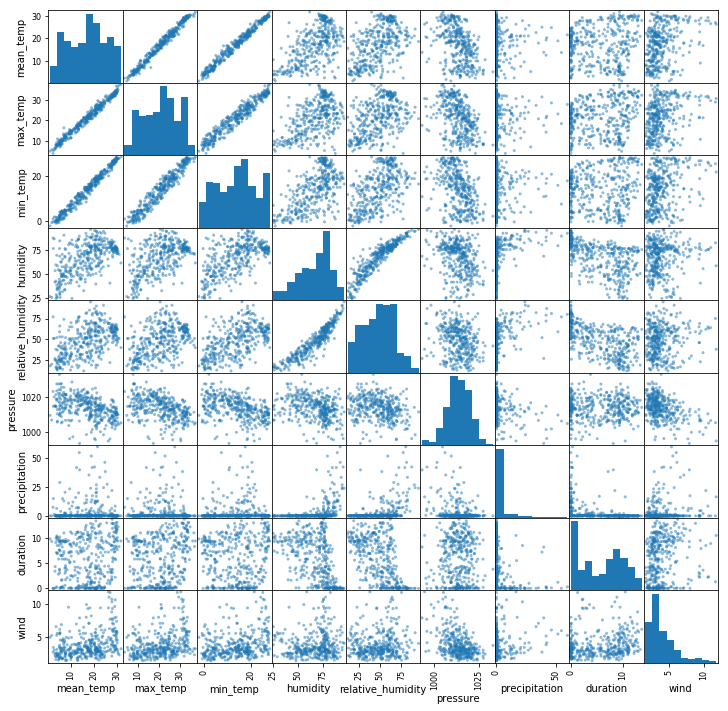

In [6]:
# pandasを用いた解答例

from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 12));

## Q-3

任意のデータをヒストグラムに可視化

(array([88., 25., 37., 18., 21., 39., 52., 41., 29., 15.]),
 array([ 0.  ,  1.37,  2.74,  4.11,  5.48,  6.85,  8.22,  9.59, 10.96,
        12.33, 13.7 ]),
 <a list of 10 Patch objects>)

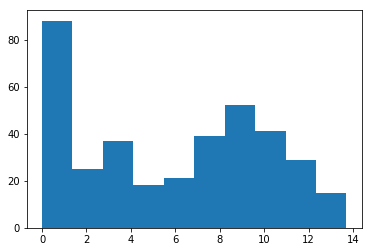

In [7]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df["duration"])

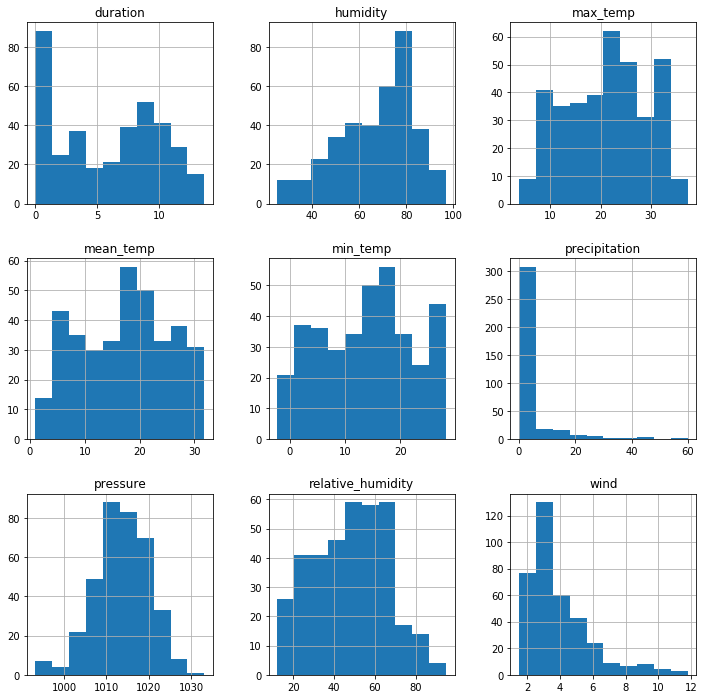

In [8]:
# pandasを用いた解答例

df.hist(figsize=(12, 12));

## Q-4

任意のデータを箱ひげ図に可視化

Text(0.5, 1.0, 'temperature')

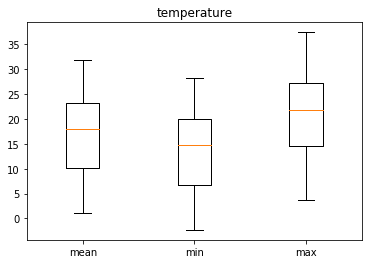

In [9]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(
    [df["mean_temp"], df["min_temp"], df["max_temp"]], labels=["mean", "min", "max"]
)
ax.set_title("temperature")

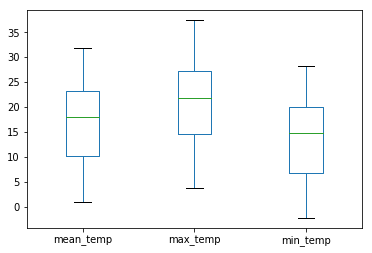

In [10]:
# pandasを用いた解答例

df[["mean_temp", "max_temp", "min_temp"]].plot.box()

## 月ごとの平均値を算出

In [11]:
monthly_df = df.resample("1M").mean()
monthly_df.index = monthly_df.index.map(lambda x: calendar.month_abbr[x.month])
monthly_df

mean_temp   max_temp   min_temp   humidity  relative_humidity  \
date                                                                  
Jan    5.590323   9.645161   1.800000  49.387097          29.741935   
Feb    5.846429   9.657143   2.178571  51.071429          32.678571   
Mar   11.864516  16.158065   7.377419  63.967742          43.838710   
Apr   17.176667  21.440000  13.363333  64.866667          42.433333   
May   19.996774  24.190323  16.325806  68.354839          46.903226   
Jun   22.456667  26.266667  19.676667  79.166667          60.633333   
Jul   28.245161  32.103226  25.425806  77.419355          59.677419   
Aug   28.141935  32.170968  25.206452  76.290323          58.096774   
Sep   23.530000  26.980000  20.680000  81.133333          65.366667   
Oct   19.677419  23.254839  16.645161  70.419355          52.225806   
Nov   14.640000  18.196667  11.456667  65.900000          47.633333   
Dec    8.909677  12.458065   5.587097  55.483871          38.258065   

         pressure  precipitation  duration      wind  
date                                                  
Jan   1013.616129       1.935484  6.738710  3.680645  
Feb   1016.053571       0.642857  6.000000  3.167857  
Mar   1016.319355       6.080645  6.412903  4.087097  
Apr   1013.820000       2.550000  6.520000  4.816667  
May   1010.925806       6.193548  6.264516  4.383871  
Jun   1008.813333       5.216667  5.450000  4.106667  
Jul   1010.045161       2.677419  7.683871  5.022581  
Aug   1008.283871       1.887097  7.454839  4.719355  
Sep   1012.910000       9.500000  3.100000  4.103333  
Oct   1015.016129       2.112903  4.564516  3.393548  
Nov   1019.006667       1.133333  4.920000  2.590000  
Dec   1018.048387       1.403226  4.509677  2.790323

## Q-5

`monthly_df` の任意のデータを棒グラフに可視化

Text(0.5, 1.0, 'average wind speed')

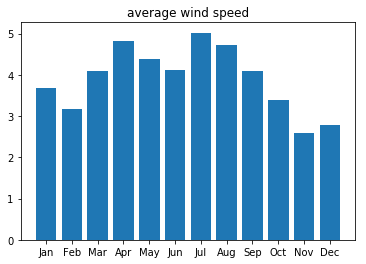

In [12]:
# 解答例

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(range(len(monthly_df)), monthly_df["wind"], tick_label=monthly_df.index)
ax.set_title("average wind speed")

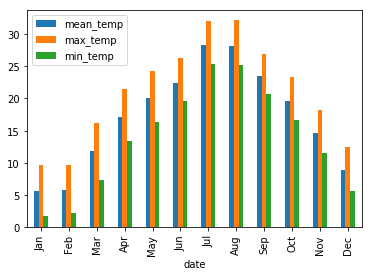

In [13]:
# pandasを用いた場合の解答例

monthly_df[["mean_temp", "max_temp", "min_temp"]].plot.bar()